In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import load_house_data, run_gradient_descent, norm_plot, plt_equal_scale, plot_cost_i_w
from lab_utils_common import dlc

In [3]:
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

In [6]:
xtr, ytr = load_house_data()
x_features = ['size(sqft)','bedrooms','floors','age']

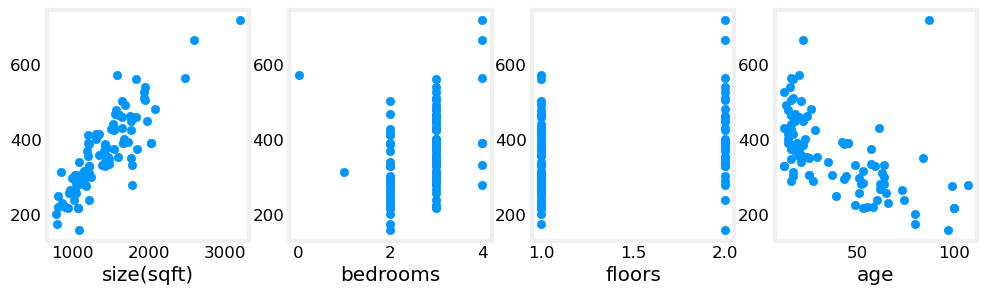

In [8]:
fig, ax=plt.subplots(1, 4, figsize=(12,3))
for i in range(len(ax)):
    ax[i].scatter(xtr[:,i], ytr)
    ax[i].set_xlabel(x_features[i])
plt.show()

In [15]:
_, _, hist = run_gradient_descent(xtr, ytr, 10, alpha=1e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 4.42313e+04  5.5e-02  1.0e-04  5.2e-05  1.2e-03  3.6e-05 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 2.76461e+04  9.8e-02  1.8e-04  9.2e-05  2.2e-03  6.5e-05 -4.3e+05 -7.9e+02 -4.0e+02 -9.5e+03 -2.8e+02
        2 1.75102e+04  1.3e-01  2.4e-04  1.2e-04  2.9e-03  8.7e-05 -3.4e+05 -6.1e+02 -3.1e+02 -7.3e+03 -2.2e+02
        3 1.13157e+04  1.6e-01  2.9e-04  1.5e-04  3.5e-03  1.0e-04 -2.6e+05 -4.8e+02 -2.4e+02 -5.6e+03 -1.8e+02
        4 7.53002e+03  1.8e-01  3.3e-04  1.7e-04  3.9e-03  1.2e-04 -2.1e+05 -3.7e+02 -1.9e+02 -4.2e+03 -1.4e+02
        5 5.21639e+03  2.0e-01  3.5e-04  1.8e-04  4.2e-03  1.3e-04 -1.6e+05 -2.9e+02 -1.5e+02 -3.1e+03 -1.1e+02
        6 3.80242e+03  2.1e-01  3.8e-04  1.9e-04  4.5e-03  1.4e-04 -1.3e+05 -2.2e+02 -1.1e+02 -2.3e+03 -

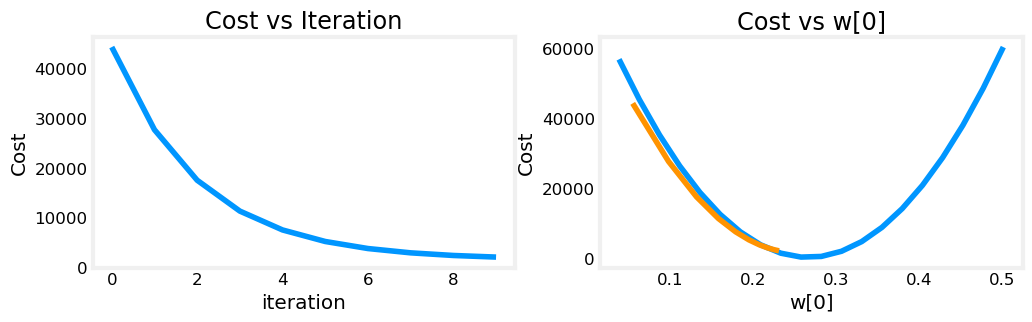

In [16]:
plot_cost_i_w(xtr, ytr, hist)

np.float64(1418.3737373737374)

In [93]:
def zscore_normalize_features(x):
    m, n = xtr.shape
    mean = np.zeros((n,))
    std = np.zeros((n,))
    x_norm = np.zeros_like(x)
    for i in range(n):
        mean[i] = np.mean(x[:, i])
        std[i] = np.std(x[:, i])
        x_norm[:, i] = (x[:, i] - mean[i]) / std[i]
    return x_norm, mean, std


# # Another way to do this
# def zscore_normalize_features(x):
#     mean = np.mean(x, axis=0)
#     std = np.std(x, axis=0)
#     x_norm = (x-mean)/std
#     return x_norm, mean, std

In [94]:
norm, mean, std = zscore_normalize_features(xtr)
x_mean = xtr - mean

(np.float64(-1.8237250595431904),
 np.float64(4.606059948619359),
 np.float64(-1.2077733915059707),
 np.float64(2.8460897350493126))

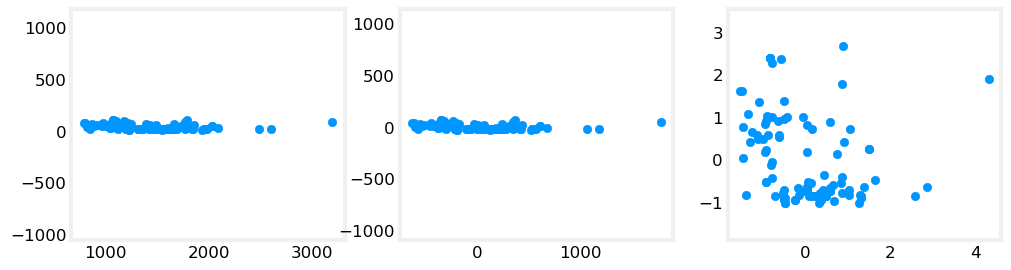

In [95]:
fig, ax=plt.subplots(1,3, figsize = (12,3))
ax[0].scatter(xtr[:,0], xtr[:,3])
ax[0].axis("equal")
ax[1].scatter(x_mean[:,0], x_mean[:,3])
ax[1].axis("equal")
ax[2].scatter(norm[:,0], norm[:,3])
ax[2].axis("equal")

In [96]:
print(f"mean={mean}, \nstd={std}")

mean=[1.42e+03 2.72e+00 1.38e+00 3.84e+01], 
std=[411.62   0.65   0.49  25.78]


In [101]:
print(f"Raw: {np.ptp(xtr, axis=0)}")
print(f"Nomralized: {np.ptp(norm, axis=0)}")

Raw: [2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Nomralized: [5.85 6.14 2.06 3.69]


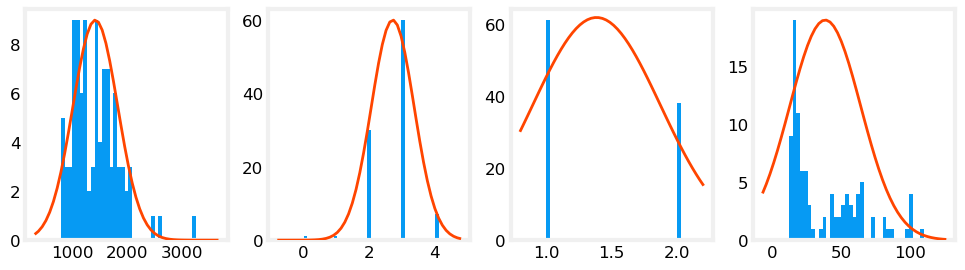

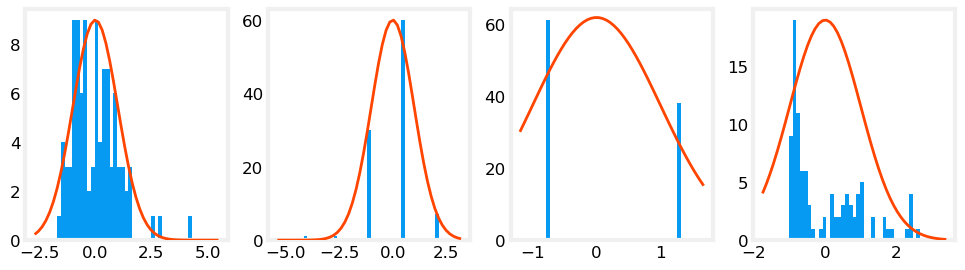

In [103]:
fig, ax=plt.subplots(1, 4, figsize=(12,3))
for i in range(len(ax)):
    norm_plot(ax[i], xtr[:,i])

fig, ax=plt.subplots(1, 4, figsize=(12,3))
for i in range(len(ax)):
    norm_plot(ax[i], norm[:,i])

In [100]:
w_norm, b_norm, hist = run_gradient_descent(norm, ytr, 350, 1.0e-1, )

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 5.76170e+04  8.9e+00  3.0e+00  3.3e+00 -6.0e+00  3.6e+01 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
       35 4.11241e+02  8.6e+01 -9.9e+00 -1.8e+01 -4.1e+01  3.5e+02 -8.3e+00  3.8e+00  5.6e+00 -2.8e-01 -9.1e+00
       70 2.33724e+02  1.0e+02 -1.8e+01 -2.8e+01 -3.9e+01  3.6e+02 -2.5e+00  1.2e+00  1.5e+00 -4.3e-01 -2.3e-01
      105 2.20543e+02  1.1e+02 -2.0e+01 -3.1e+01 -3.8e+01  3.6e+02 -7.7e-01  3.8e-01  4.4e-01 -1.5e-01 -5.7e-03
      140 2.19330e+02  1.1e+02 -2.1e+01 -3.2e+01 -3.8e+01  3.6e+02 -2.3e-01  1.2e-01  1.3e-01 -4.5e-02 -1.4e-04
      175 2.19218e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -7.1e-02  3.6e-02  4.0e-02 -1.4e-02 -3.6e-06
      210 2.19208e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -2.2e-02  1.1e-02  1.2e-02 -4.2e-03 -

In [104]:
m = norm.shape[0]
y_hat = np.zeros(m)
for i in range(m):
    y_hat[i] = w_norm.dot(norm[i])+b_norm

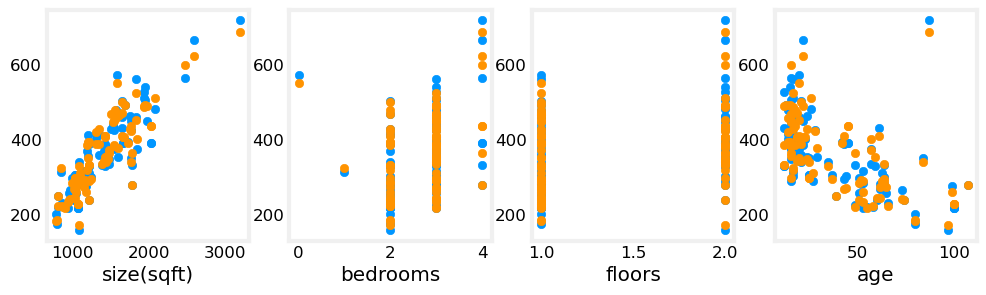

In [107]:
fig, ax=plt.subplots(1, 4, figsize=(12,3))
for i in range(len(ax)):
    ax[i].scatter(xtr[:,i], ytr, label="target")
    ax[i].set_xlabel(x_features[i])
    ax[i].scatter(xtr[:,i], y_hat, color=dlc["dlorange"], label="predict")

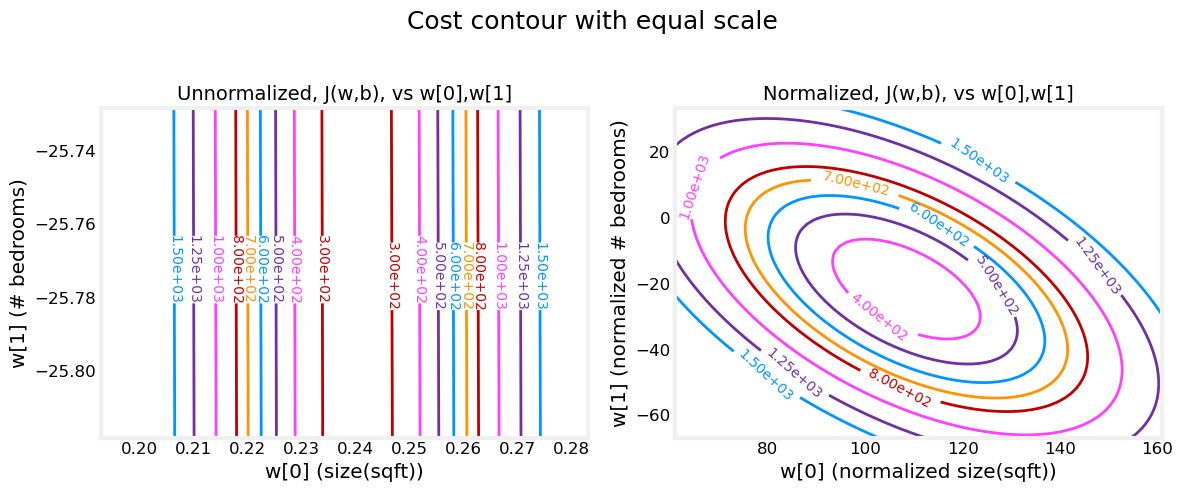

In [108]:
plt_equal_scale(xtr, norm, ytr)